<a href="https://colab.research.google.com/github/Jinsoloust/Section1_PR/blob/main/AI_03_%EC%9D%B4%EC%A7%84%EC%86%94_Section_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 도구 가져오기

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 기본 데이터 불러오기


df = pd.read_csv('/content/drive/MyDrive/vgames2.csv', encoding= 'unicode_escape')

df.info()
# 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16551 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
# 전처리 과정
# 기본 형태
# 
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 작업 용이성을 위해 각 지역별로 데이터 프레임 생성
# 북미

df.na = df[['Name', 'Platform', 'Year', 'Genre', 'NA_Sales']]
df.na

,Name,Platform,Year,Genre,NA_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,0.04
1,The Munchables,Wii,2009.0,Action,0.17
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,0.12
...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,0.15
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,0.01
16595,NBA 2K16,PS3,2015.0,Sports,0.44
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,0.05


In [ ]:
# 지역 - 장르의 연관성 조사 위해 각 지역별로 데이터 프레임 제작
# 북미


df.na['NA_Sales'] = df.na['NA_Sales'].replace({'K': '*1e3', 'M': '*1e6', '-':'-1'}, regex=True).map(pd.eval).astype(int)
df.na

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Name,Platform,Year,Genre,NA_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,0
1,The Munchables,Wii,2009.0,Action,0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,0
...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,0
16595,NBA 2K16,PS3,2015.0,Sports,0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,0


In [ ]:
df.na['NA_Sales'].max()

9630000

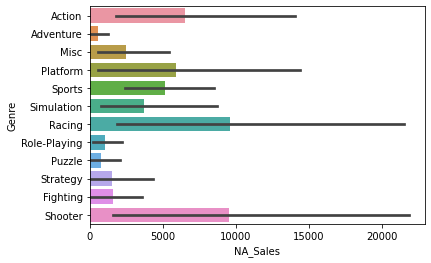

In [ ]:
# 북미 지역 차트

bp_na = sns.barplot(data = df.na, x = "NA_Sales", y = "Genre")


In [ ]:
# 유럽 지역 - 장르

df.eu = df[['Name', 'Platform', 'Year', 'Genre', 'EU_Sales']]

df.eu['EU_Sales'] = df.eu['EU_Sales'].replace({'K': '*1e3', 'M': '*1e6', '-':'-1'}, regex=True).map(pd.eval).astype(int)
df.eu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Name,Platform,Year,Genre,EU_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,0
1,The Munchables,Wii,2009.0,Action,0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,0
...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,0
16595,NBA 2K16,PS3,2015.0,Sports,0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,0


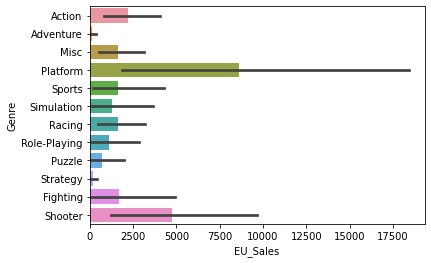

In [ ]:
# 유럽 지역 차트

bp_eu = sns.barplot(data = df.eu, x = "EU_Sales", y = "Genre")


In [ ]:
# 일본 지역 - 장르

df.jp = df[['Name', 'Platform', 'Year', 'Genre', 'JP_Sales']]

df.jp['JP_Sales'] = df.jp['JP_Sales'].replace({'K': '*1e3', 'M': '*1e6', '-':'-1'}, regex=True).map(pd.eval).astype(int)
df.jp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Name,Platform,Year,Genre,JP_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,0
1,The Munchables,Wii,2009.0,Action,0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,0
...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,0
16595,NBA 2K16,PS3,2015.0,Sports,0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,0


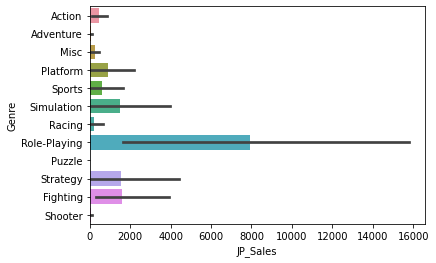

In [ ]:
# 일본 지역 차트

bp_jp = sns.barplot(data = df.jp, x = "JP_Sales", y = "Genre")

In [ ]:
# 기타 지역 - 장르

df.ot = df[['Name', 'Platform', 'Year', 'Genre', 'Other_Sales']]

df.ot['Other_Sales'] = df.ot['Other_Sales'].replace({'K': '*1e3', 'M': '*1e6', '-':'-1'}, regex=True).map(pd.eval).astype(int)
df.ot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Name,Platform,Year,Genre,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,0
1,The Munchables,Wii,2009.0,Action,0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,0
...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,0
16595,NBA 2K16,PS3,2015.0,Sports,0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,0


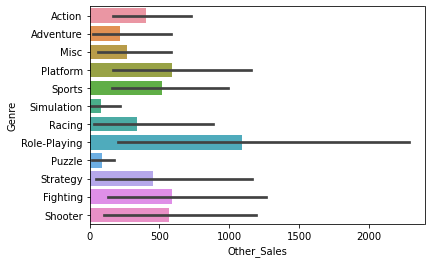

In [ ]:
# 기타 지역 차트

bp_ot = sns.barplot(data = df.ot, x = "Other_Sales", y = "Genre")

In [ ]:
# 결론
# 각 지역별 특정 장르 선호 사상
# 북미 = 레이싱/슈터/액션
# 유럽 = 플랫폼/슈터
# 일본 = 롤플레잉
# 기타 = 롤플레잉

In [ ]:
# 연도 - 트렌드는 관련이 있을까? 
# 트렌드 파악 위해 플랫폼과 연도를 분석

df_yt = df[['Year', 'Platform']]
df_yt

,Year,Platform
0,2008.0,DS
1,2009.0,Wii
2,2010.0,PSP
3,2010.0,DS
4,2010.0,PS3
...,...,...
16593,2006.0,GC
16594,2005.0,PSP
16595,2015.0,PS3
16596,2013.0,PSV


<function matplotlib.pyplot.show>

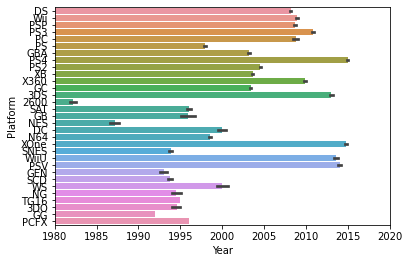

In [ ]:
# 시각화

bp_yt = sns.barplot(data = df_yt, x = "Year", y = "Platform")
bp_yt.set(xlim=[1980, 2020])

plt.show

In [ ]:
#결론
# 연도별로 선호하는 플랫폼이 다르다. 현재 기준 게임을 내게 된다면 PS/3ds/Xone/Wii로 내야 함.

In [ ]:
#  출고량이 높은 게임에 대한 분석 및 시각화 프로세스를 포함.
# 출고량이 높은 게임 선정 

# 북미 지역 gta5(x360) 10914
# 유럽 피파 14(x360) 7866
# 일본 Pokemon FireRed/Pokemon LeafGreen (GBA) 2004 3.15m
# 기타 Fallout 3 (PS3) 0.59


NA_Sales    90K
dtype: object


In [ ]:
# 가정을 세움 - a를 하면 어떻게 될 것인가? 검증하고 확인

In [ ]:
#결론